In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import Birch
import scipy.cluster.hierarchy as sch
import sklearn.metrics as sm
from sklearn.cluster import AgglomerativeClustering
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("C:\\Users\\bidve\\DeepAyurveda\\src\\all_models\\data.csv")
data

freq = 60
ts = 0.3

In [3]:
data.isna().sum()

SampleIdx            0
Gender               0
bodyBuild_Size       0
bodyFrame_Breadth    0
bodyFrame_Length     1
                    ..
skin_mark            0
skin_mole            0
skin_pimple          0
skin_wrinkled        0
class                0
Length: 135, dtype: int64

In [4]:
data.drop('SampleIdx',axis='columns',inplace=True)

In [5]:
data.head(10)

,Gender,bodyBuild_Size,bodyFrame_Breadth,bodyFrame_Length,bodyHair_Color,chest_Breadth,eye_Color,eye_Size,eye_Symmetry,eyebrow_Size,...,teeth_Appearance1,teeth_Appearance2,voice_clear,skin_cracked,skin_freckle,skin_mark,skin_mole,skin_pimple,skin_wrinkled,class
0,Male,Weaklydeveloped,Thin/Narrow,Long,Black,Thin/Narrow,DarkBrown,Moderatelydeveloped,Proportionate,Medium,...,Non_Brittle/Cracked,Non_Loose,Clear,Non_Cracked,Non_Freckles,Non_Marks,Non_Moles,Pimples,Non_Wrinkled,Vata
1,Male,Welldeveloped,Broad,Long,DarkBrown,Broad,DarkBrown,Moderatelydeveloped,Proportionate,Medium,...,Non_Brittle/Cracked,Non_Loose,Clear,Non_Cracked,Non_Freckles,Marks,Non_Moles,Non_Pimples,Non_Wrinkled,Kapha
2,Male,Weaklydeveloped,Thin/Narrow,Long,LightBrown,Thin/Narrow,LightBrown,Weaklydeveloped,Proportionate,Large,...,Non_Brittle/Cracked,Non_Loose,Non_Clear,Cracked,Non_Freckles,Non_Marks,Moles,Pimples,Wrinkled,Vata
3,Male,Weaklydeveloped,Thin/Narrow,Long,Dusky,Thin/Narrow,DarkBrown,Weaklydeveloped,Proportionate,Medium,...,Non_Brittle/Cracked,Non_Loose,Clear,Cracked,Non_Freckles,Non_Marks,Non_Moles,Non_Pimples,Wrinkled,Vata
4,Male,Welldeveloped,Broad,Long,Black,Broad,Black,Moderatelydeveloped,Proportionate,Medium,...,Non_Brittle/Cracked,Non_Loose,Non_Clear,Non_Cracked,Non_Freckles,Marks,Moles,Non_Pimples,Non_Wrinkled,Kapha
5,Male,Moderatelydeveloped,Broad,Long,Black,Medium,LightBrown,Moderatelydeveloped,Proportionate,Medium,...,Non_Brittle/Cracked,Non_Loose,Clear,Non_Cracked,Non_Freckles,Non_Marks,Moles,Non_Pimples,Non_Wrinkled,Pitta
6,Male,Welldeveloped,Broad,Long,Black,Broad,Black,Weaklydeveloped,Disproportionate,Large,...,Non_Brittle/Cracked,Non_Loose,Clear,Non_Cracked,Non_Freckles,Marks,Non_Moles,Pimples,Non_Wrinkled,Kapha
7,Male,Moderatelydeveloped,Medium,Medium,LightBrown,Medium,LightBrown,Moderatelydeveloped,Proportionate,Medium,...,Non_Brittle/Cracked,Non_Loose,Clear,Non_Cracked,Non_Freckles,Marks,Moles,Non_Pimples,Non_Wrinkled,Pitta
8,Male,Welldeveloped,Broad,Long,DarkBrown,Broad,DarkBrown,Moderatelydeveloped,Proportionate,Large,...,Non_Brittle/Cracked,Non_Loose,Non_Clear,Non_Cracked,Non_Freckles,Marks,Non_Moles,Non_Pimples,Non_Wrinkled,Kapha
9,Male,Welldeveloped,Broad,Long,DarkBrown,Medium,DarkBrown,Moderatelydeveloped,Proportionate,Medium,...,Non_Brittle/Cracked,Non_Loose,Clear,Non_Cracked,Non_Freckles,Non_Marks,Non_Moles,Pimples,Non_Wrinkled,Kapha


In [6]:
data.shape

(147, 134)

In [7]:
dosha = data['class']
dosha

0       Vata
1      Kapha
2       Vata
3       Vata
4      Kapha
       ...  
142     Vata
143     Vata
144     Vata
145     Vata
146    Pitta
Name: class, Length: 147, dtype: object

In [8]:
data1 = data.copy()
data1

cate = data1['class']

In [9]:
data = data.ffill(axis = 1)
data

new_data_cluster = data.copy()
new_data_cluster.head(10)

,Gender,bodyBuild_Size,bodyFrame_Breadth,bodyFrame_Length,bodyHair_Color,chest_Breadth,eye_Color,eye_Size,eye_Symmetry,eyebrow_Size,...,teeth_Appearance1,teeth_Appearance2,voice_clear,skin_cracked,skin_freckle,skin_mark,skin_mole,skin_pimple,skin_wrinkled,class
0,Male,Weaklydeveloped,Thin/Narrow,Long,Black,Thin/Narrow,DarkBrown,Moderatelydeveloped,Proportionate,Medium,...,Non_Brittle/Cracked,Non_Loose,Clear,Non_Cracked,Non_Freckles,Non_Marks,Non_Moles,Pimples,Non_Wrinkled,Vata
1,Male,Welldeveloped,Broad,Long,DarkBrown,Broad,DarkBrown,Moderatelydeveloped,Proportionate,Medium,...,Non_Brittle/Cracked,Non_Loose,Clear,Non_Cracked,Non_Freckles,Marks,Non_Moles,Non_Pimples,Non_Wrinkled,Kapha
2,Male,Weaklydeveloped,Thin/Narrow,Long,LightBrown,Thin/Narrow,LightBrown,Weaklydeveloped,Proportionate,Large,...,Non_Brittle/Cracked,Non_Loose,Non_Clear,Cracked,Non_Freckles,Non_Marks,Moles,Pimples,Wrinkled,Vata
3,Male,Weaklydeveloped,Thin/Narrow,Long,Dusky,Thin/Narrow,DarkBrown,Weaklydeveloped,Proportionate,Medium,...,Non_Brittle/Cracked,Non_Loose,Clear,Cracked,Non_Freckles,Non_Marks,Non_Moles,Non_Pimples,Wrinkled,Vata
4,Male,Welldeveloped,Broad,Long,Black,Broad,Black,Moderatelydeveloped,Proportionate,Medium,...,Non_Brittle/Cracked,Non_Loose,Non_Clear,Non_Cracked,Non_Freckles,Marks,Moles,Non_Pimples,Non_Wrinkled,Kapha
5,Male,Moderatelydeveloped,Broad,Long,Black,Medium,LightBrown,Moderatelydeveloped,Proportionate,Medium,...,Non_Brittle/Cracked,Non_Loose,Clear,Non_Cracked,Non_Freckles,Non_Marks,Moles,Non_Pimples,Non_Wrinkled,Pitta
6,Male,Welldeveloped,Broad,Long,Black,Broad,Black,Weaklydeveloped,Disproportionate,Large,...,Non_Brittle/Cracked,Non_Loose,Clear,Non_Cracked,Non_Freckles,Marks,Non_Moles,Pimples,Non_Wrinkled,Kapha
7,Male,Moderatelydeveloped,Medium,Medium,LightBrown,Medium,LightBrown,Moderatelydeveloped,Proportionate,Medium,...,Non_Brittle/Cracked,Non_Loose,Clear,Non_Cracked,Non_Freckles,Marks,Moles,Non_Pimples,Non_Wrinkled,Pitta
8,Male,Welldeveloped,Broad,Long,DarkBrown,Broad,DarkBrown,Moderatelydeveloped,Proportionate,Large,...,Non_Brittle/Cracked,Non_Loose,Non_Clear,Non_Cracked,Non_Freckles,Marks,Non_Moles,Non_Pimples,Non_Wrinkled,Kapha
9,Male,Welldeveloped,Broad,Long,DarkBrown,Medium,DarkBrown,Moderatelydeveloped,Proportionate,Medium,...,Non_Brittle/Cracked,Non_Loose,Clear,Non_Cracked,Non_Freckles,Non_Marks,Non_Moles,Pimples,Non_Wrinkled,Kapha


In [10]:

data2 = data.copy()
data2

,Gender,bodyBuild_Size,bodyFrame_Breadth,bodyFrame_Length,bodyHair_Color,chest_Breadth,eye_Color,eye_Size,eye_Symmetry,eyebrow_Size,...,teeth_Appearance1,teeth_Appearance2,voice_clear,skin_cracked,skin_freckle,skin_mark,skin_mole,skin_pimple,skin_wrinkled,class
0,Male,Weaklydeveloped,Thin/Narrow,Long,Black,Thin/Narrow,DarkBrown,Moderatelydeveloped,Proportionate,Medium,...,Non_Brittle/Cracked,Non_Loose,Clear,Non_Cracked,Non_Freckles,Non_Marks,Non_Moles,Pimples,Non_Wrinkled,Vata
1,Male,Welldeveloped,Broad,Long,DarkBrown,Broad,DarkBrown,Moderatelydeveloped,Proportionate,Medium,...,Non_Brittle/Cracked,Non_Loose,Clear,Non_Cracked,Non_Freckles,Marks,Non_Moles,Non_Pimples,Non_Wrinkled,Kapha
2,Male,Weaklydeveloped,Thin/Narrow,Long,LightBrown,Thin/Narrow,LightBrown,Weaklydeveloped,Proportionate,Large,...,Non_Brittle/Cracked,Non_Loose,Non_Clear,Cracked,Non_Freckles,Non_Marks,Moles,Pimples,Wrinkled,Vata
3,Male,Weaklydeveloped,Thin/Narrow,Long,Dusky,Thin/Narrow,DarkBrown,Weaklydeveloped,Proportionate,Medium,...,Non_Brittle/Cracked,Non_Loose,Clear,Cracked,Non_Freckles,Non_Marks,Non_Moles,Non_Pimples,Wrinkled,Vata
4,Male,Welldeveloped,Broad,Long,Black,Broad,Black,Moderatelydeveloped,Proportionate,Medium,...,Non_Brittle/Cracked,Non_Loose,Non_Clear,Non_Cracked,Non_Freckles,Marks,Moles,Non_Pimples,Non_Wrinkled,Kapha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Female,Weaklydeveloped,Thin/Narrow,Medium,LightBrown,Thin/Narrow,DarkBrown,Moderatelydeveloped,Proportionate,Medium,...,Non_Brittle/Cracked,Non_Loose,Non_Clear,Non_Cracked,Non_Freckles,Non_Marks,Non_Moles,Non_Pimples,Wrinkled,Vata
143,Female,Weaklydeveloped,Thin/Narrow,Medium,LightBrown,Medium,LightBrown,Moderatelydeveloped,Proportionate,Medium,...,Non_Brittle/Cracked,Non_Loose,Non_Clear,Cracked,Freckles,Marks,Moles,Non_Pimples,Non_Wrinkled,Vata
144,Female,Weaklydeveloped,Thin/Narrow,Tooshort/Toolong,DarkBrown,Thin/Narrow,Black,Weaklydeveloped,Proportionate,Medium,...,Non_Brittle/Cracked,Non_Loose,Non_Clear,Non_Cracked,Non_Freckles,Marks,Moles,Non_Pimples,Non_Wrinkled,Vata
145,Female,Weaklydeveloped,Medium,Medium,LightBrown,Medium,LightBrown,Moderatelydeveloped,Proportionate,Large,...,Non_Brittle/Cracked,Non_Loose,Clear,Non_Cracked,Freckles,Non_Marks,Moles,Non_Pimples,Wrinkled,Vata


In [11]:
data.drop('class',axis='columns',inplace=True)

In [12]:
data.isna().sum()

Gender               0
bodyBuild_Size       0
bodyFrame_Breadth    0
bodyFrame_Length     0
bodyHair_Color       0
                    ..
skin_freckle         0
skin_mark            0
skin_mole            0
skin_pimple          0
skin_wrinkled        0
Length: 133, dtype: int64

In [13]:
new_data = pd.get_dummies(data)
new_data

,Gender_Female,Gender_Male,bodyBuild_Size_Moderatelydeveloped,bodyBuild_Size_Weaklydeveloped,bodyBuild_Size_Welldeveloped,bodyFrame_Breadth_Broad,bodyFrame_Breadth_Medium,bodyFrame_Breadth_Thin/Narrow,bodyFrame_Length_Long,bodyFrame_Length_Medium,...,skin_freckle_Freckles,skin_freckle_Non_Freckles,skin_mark_Marks,skin_mark_Non_Marks,skin_mole_Moles,skin_mole_Non_Moles,skin_pimple_Non_Pimples,skin_pimple_Pimples,skin_wrinkled_Non_Wrinkled,skin_wrinkled_Wrinkled
0,0,1,0,1,0,0,0,1,1,0,...,0,1,0,1,0,1,0,1,1,0
1,0,1,0,0,1,1,0,0,1,0,...,0,1,1,0,0,1,1,0,1,0
2,0,1,0,1,0,0,0,1,1,0,...,0,1,0,1,1,0,0,1,0,1
3,0,1,0,1,0,0,0,1,1,0,...,0,1,0,1,0,1,1,0,0,1
4,0,1,0,0,1,1,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,1,0,0,1,0,0,0,1,0,1,...,0,1,0,1,0,1,1,0,0,1
143,1,0,0,1,0,0,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
144,1,0,0,1,0,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
145,1,0,0,1,0,0,1,0,0,1,...,1,0,0,1,1,0,1,0,0,1


In [14]:
data

,Gender,bodyBuild_Size,bodyFrame_Breadth,bodyFrame_Length,bodyHair_Color,chest_Breadth,eye_Color,eye_Size,eye_Symmetry,eyebrow_Size,...,speech_Irrelevant,teeth_Appearance1,teeth_Appearance2,voice_clear,skin_cracked,skin_freckle,skin_mark,skin_mole,skin_pimple,skin_wrinkled
0,Male,Weaklydeveloped,Thin/Narrow,Long,Black,Thin/Narrow,DarkBrown,Moderatelydeveloped,Proportionate,Medium,...,Non_Irrelevantinbetween,Non_Brittle/Cracked,Non_Loose,Clear,Non_Cracked,Non_Freckles,Non_Marks,Non_Moles,Pimples,Non_Wrinkled
1,Male,Welldeveloped,Broad,Long,DarkBrown,Broad,DarkBrown,Moderatelydeveloped,Proportionate,Medium,...,Non_Irrelevantinbetween,Non_Brittle/Cracked,Non_Loose,Clear,Non_Cracked,Non_Freckles,Marks,Non_Moles,Non_Pimples,Non_Wrinkled
2,Male,Weaklydeveloped,Thin/Narrow,Long,LightBrown,Thin/Narrow,LightBrown,Weaklydeveloped,Proportionate,Large,...,Non_Irrelevantinbetween,Non_Brittle/Cracked,Non_Loose,Non_Clear,Cracked,Non_Freckles,Non_Marks,Moles,Pimples,Wrinkled
3,Male,Weaklydeveloped,Thin/Narrow,Long,Dusky,Thin/Narrow,DarkBrown,Weaklydeveloped,Proportionate,Medium,...,Irrelevantinbetween,Non_Brittle/Cracked,Non_Loose,Clear,Cracked,Non_Freckles,Non_Marks,Non_Moles,Non_Pimples,Wrinkled
4,Male,Welldeveloped,Broad,Long,Black,Broad,Black,Moderatelydeveloped,Proportionate,Medium,...,Non_Irrelevantinbetween,Non_Brittle/Cracked,Non_Loose,Non_Clear,Non_Cracked,Non_Freckles,Marks,Moles,Non_Pimples,Non_Wrinkled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Female,Weaklydeveloped,Thin/Narrow,Medium,LightBrown,Thin/Narrow,DarkBrown,Moderatelydeveloped,Proportionate,Medium,...,Irrelevantinbetween,Non_Brittle/Cracked,Non_Loose,Non_Clear,Non_Cracked,Non_Freckles,Non_Marks,Non_Moles,Non_Pimples,Wrinkled
143,Female,Weaklydeveloped,Thin/Narrow,Medium,LightBrown,Medium,LightBrown,Moderatelydeveloped,Proportionate,Medium,...,Non_Irrelevantinbetween,Non_Brittle/Cracked,Non_Loose,Non_Clear,Cracked,Freckles,Marks,Moles,Non_Pimples,Non_Wrinkled
144,Female,Weaklydeveloped,Thin/Narrow,Tooshort/Toolong,DarkBrown,Thin/Narrow,Black,Weaklydeveloped,Proportionate,Medium,...,Non_Irrelevantinbetween,Non_Brittle/Cracked,Non_Loose,Non_Clear,Non_Cracked,Non_Freckles,Marks,Moles,Non_Pimples,Non_Wrinkled
145,Female,Weaklydeveloped,Medium,Medium,LightBrown,Medium,LightBrown,Moderatelydeveloped,Proportionate,Large,...,Non_Irrelevantinbetween,Non_Brittle/Cracked,Non_Loose,Clear,Non_Cracked,Freckles,Non_Marks,Moles,Non_Pimples,Wrinkled


In [15]:
from sklearn.preprocessing import LabelEncoder
data1 = data1.apply(LabelEncoder().fit_transform)
data1

,Gender,bodyBuild_Size,bodyFrame_Breadth,bodyFrame_Length,bodyHair_Color,chest_Breadth,eye_Color,eye_Size,eye_Symmetry,eyebrow_Size,...,teeth_Appearance1,teeth_Appearance2,voice_clear,skin_cracked,skin_freckle,skin_mark,skin_mole,skin_pimple,skin_wrinkled,class
0,1,1,2,0,0,2,1,0,1,1,...,1,1,0,1,1,1,1,1,0,2
1,1,2,0,0,1,0,1,0,1,1,...,1,1,0,1,1,0,1,0,0,0
2,1,1,2,0,3,2,3,1,1,0,...,1,1,1,0,1,1,0,1,1,2
3,1,1,2,0,2,2,1,1,1,1,...,1,1,0,0,1,1,1,0,1,2
4,1,2,0,0,0,0,0,0,1,1,...,1,1,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,0,1,2,1,3,2,1,0,1,1,...,1,1,1,1,1,1,1,0,1,2
143,0,1,2,1,3,1,3,0,1,1,...,1,1,1,0,0,0,0,0,0,2
144,0,1,2,2,1,2,0,1,1,1,...,1,1,1,1,1,0,0,0,0,2
145,0,1,1,1,3,1,3,0,1,0,...,1,1,0,1,0,1,0,0,1,2


In [16]:
X = data1.drop(['class'], axis = 1)

In [17]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X,data1['class'])


In [18]:
f_p_values

(array([4.01060606e+00, 5.91568105e+01, 7.51486744e+01, 1.35039375e+00,
        2.41095870e+01, 6.02423248e+01, 2.87896346e+01, 9.58830399e+00,
        2.86166008e-02, 2.68023112e+00, 9.74545455e-01, 4.78417176e+01,
        3.10014493e+00, 1.03618121e-01, 7.52298571e+00, 3.26082482e+01,
        6.71983989e+00, 2.33380179e-01, 1.37230067e+01, 4.07467315e-01,
        7.61141853e+00, 5.45887437e+00, 2.21387584e+01, 7.35506786e-01,
        1.55807193e+00, 2.54619139e+01, 5.55856148e+01, 6.90524383e+01,
        1.17795793e+01, 2.96932194e+01, 3.44861619e+01, 3.24066156e+01,
        7.17425862e-01, 3.01464646e+00, 1.86433399e+01, 2.51891587e-01,
        4.04011605e+00, 9.60466897e+00, 3.56851120e-01, 0.00000000e+00,
        1.52580985e+01, 1.09760357e+01, 2.37873790e-01, 1.70181881e+01,
        6.42122895e+00, 1.38346049e-01, 1.04245465e+00, 6.98295086e+00,
        4.12065737e-01, 6.36346069e+00, 1.47770475e+00, 1.17619158e+00,
        6.54374454e+00, 5.51888112e+00, 7.36698967e+00, 1.712051

In [19]:
p_values = pd.Series(f_p_values[1])
p_values.index = X.columns
p_values.sort_values(ascending = True)

weight_Changes       1.973150e-19
bodyFrame_Breadth    4.804771e-17
shoulder_Breadth     1.012636e-15
chest_Breadth        8.289825e-14
bodyBuild_Size       1.426467e-13
                         ...     
dreams_Amount        9.331652e-01
forehead_Length      9.495101e-01
lips_Nature2         9.764400e-01
eye_Symmetry         9.857936e-01
bladder_Frequency    1.000000e+00
Length: 133, dtype: float64

In [20]:
f_values = pd.Series(f_p_values[0])
f_values.index = X.columns
f_values.sort_values(ascending = False)

weight_Changes       86.138971
bodyFrame_Breadth    75.148674
shoulder_Breadth     69.052438
chest_Breadth        60.242325
bodyBuild_Size       59.156810
                       ...    
dreams_Amount         0.138346
forehead_Length       0.103618
lips_Nature2          0.047684
eye_Symmetry          0.028617
bladder_Frequency     0.000000
Length: 133, dtype: float64

In [21]:
chi_columns = pd.Series(f_values.sort_values(ascending = False))
chi_columns

chi_10 = chi_columns.head(10)
chi_10

weight_Changes       86.138971
bodyFrame_Breadth    75.148674
shoulder_Breadth     69.052438
chest_Breadth        60.242325
bodyBuild_Size       59.156810
scalpHair_Color      55.585615
face_Size            47.841718
walking_style        45.669664
working_Quality      37.646586
retaining_quality    36.141777
dtype: float64

<AxesSubplot:>

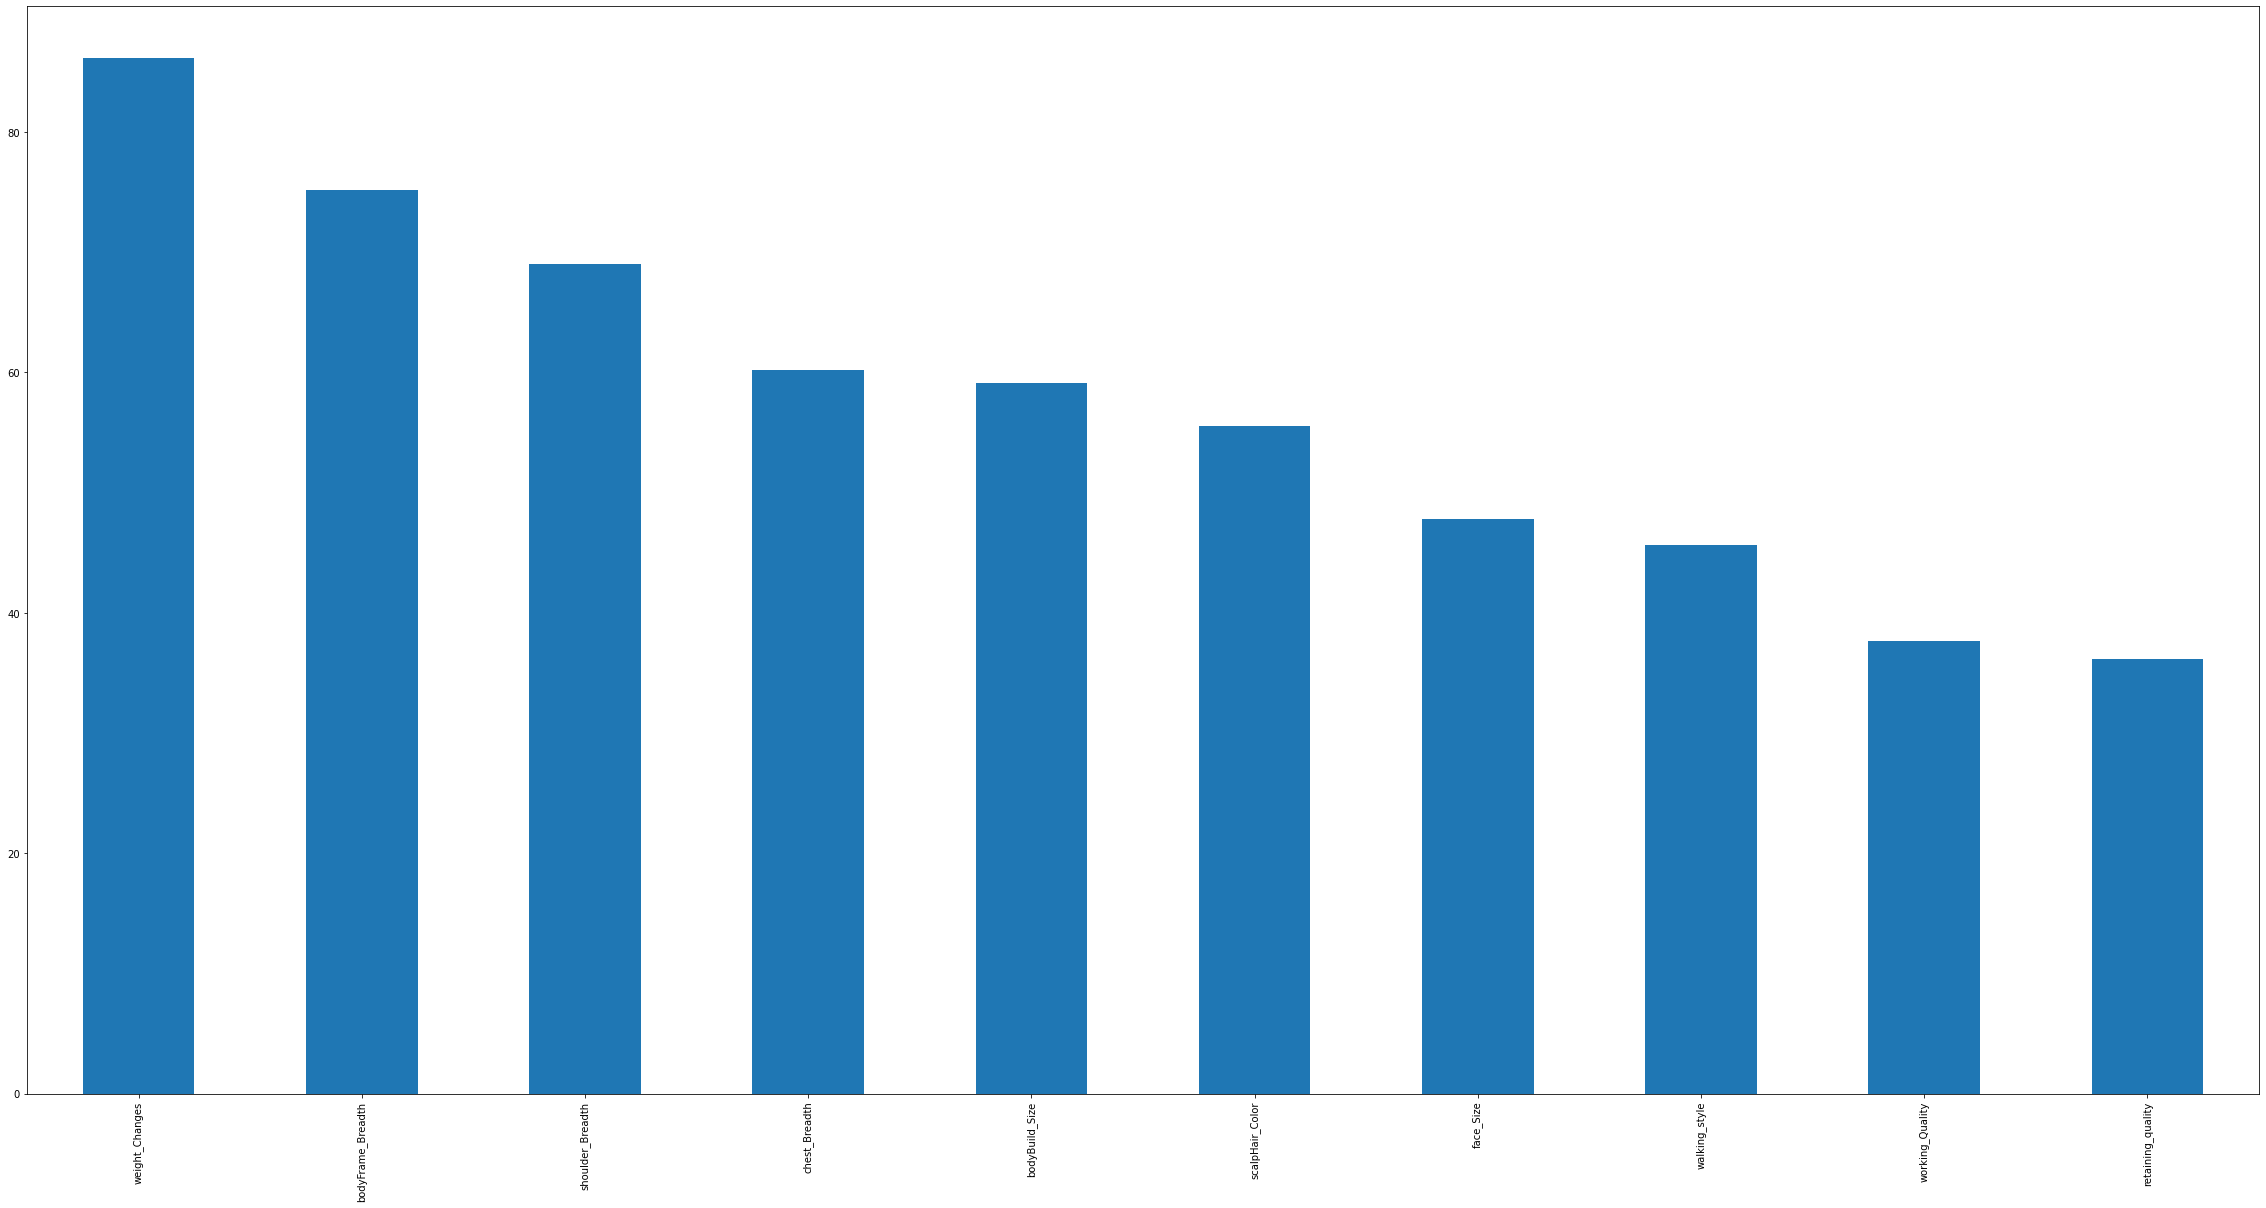

In [22]:
chi_10.sort_values(ascending = False).plot.bar(figsize = (40,20))


In [23]:
plt.show()

# Save the chart as an image
plt.savefig('bar_chart_chi.jpeg')

<Figure size 432x288 with 0 Axes>

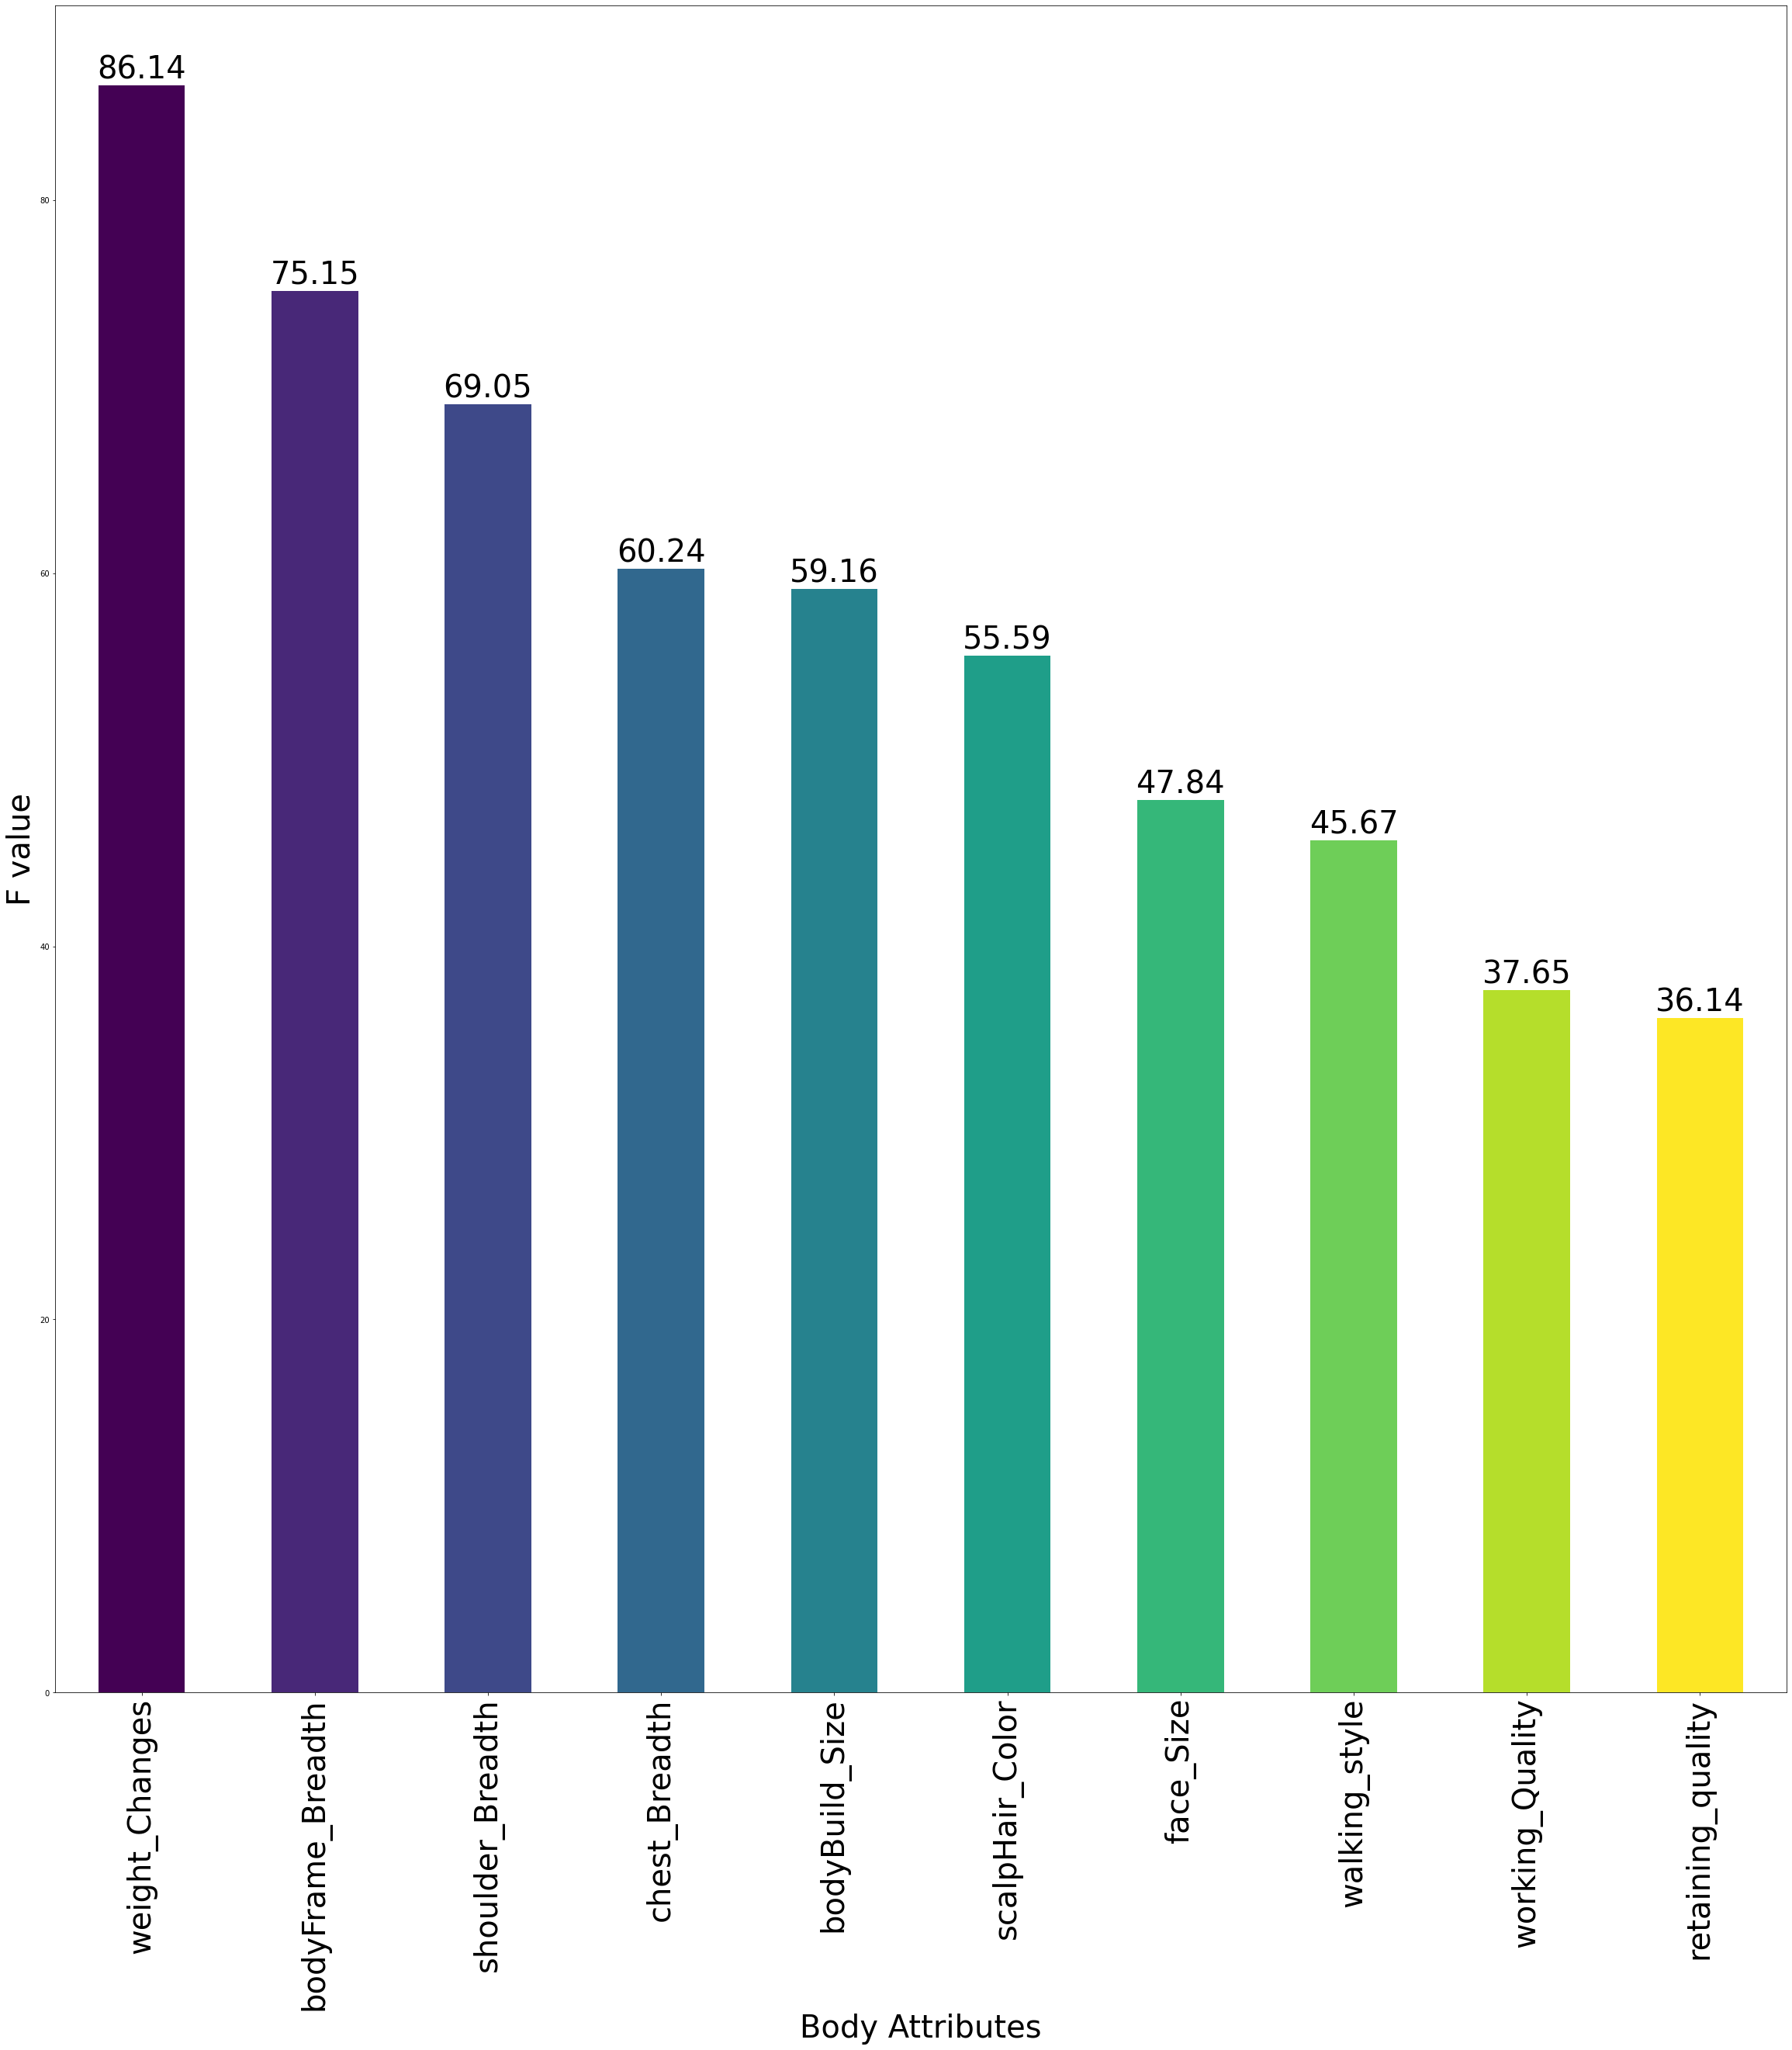

In [24]:
import matplotlib.pyplot as plt
import numpy as np  

# Assuming chi_columns is your DataFrame or Series
chi_columns_sorted = chi_10.sort_values(ascending=False)

# Define colors for the bars
colors = plt.cm.viridis(np.linspace(0, 1, len(chi_columns_sorted)))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(40, 40))

# Plot the data with specified colors
chi_columns_sorted.plot.bar(ax=ax, color=colors)

# Set the font size for x-axis labels
ax.tick_params(axis='x', labelsize=40)  

# Add labels and title
plt.xlabel('Body Attributes', fontsize=40)
plt.ylabel('F value', fontsize=40)
# plt.title('Chi-Square Result of 15 Best Attributes', fontsize=50)

# Annotate y-axis values on top of each bar
for i, v in enumerate(chi_columns_sorted):
    ax.text(i, v + 0.01, f'{v:.2f}', color='black', ha='center', va='bottom', fontsize=40)

# Show the chart (optional)
plt.show()

# Save the chart as an image
fig.savefig('bar_chart.png')


In [25]:
from sklearn.feature_selection import SelectKBest

In [26]:
from sklearn.feature_selection import SelectKBest

select = SelectKBest(chi2, freq)
select.fit(X, data1['class'])
new_cols = list(X.columns[select.get_support()])
len(new_cols)
new_cols

C:\Users\bidve\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass k=60 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


['bodyBuild_Size',
 'bodyFrame_Breadth',
 'bodyHair_Color',
 'chest_Breadth',
 'eye_Color',
 'eye_Size',
 'face_Size',
 'hair_Growth',
 'hair_Nature',
 'joint_Size',
 'lip_Size',
 'nails_color',
 'palms_Color',
 'scalpHair_Color',
 'shoulder_Breadth',
 'skin_Color',
 'skin_Nature',
 'skin_Type',
 'soles_Color',
 'teeth_Shape_Even',
 'appetite_Frequency',
 'body_Odour',
 'bodytemp_Amount',
 'bowel_Tendency',
 'sleep_Amount',
 'sleep_Quality',
 'suit_Oily',
 'suit_Pungent',
 'weight_Changes',
 'eyebrows_Movements',
 'jaw_Movements',
 'speaking_Amount',
 'speaking_Speed',
 'walking_Speed',
 'walking_style',
 'working_Quality',
 'working_style',
 'healing_Power',
 'mental_Power',
 'physical_Power',
 'resistance_Power',
 'achievingEnds_quality',
 'execution_quality',
 'forgetfulness_speed',
 'forgiveness_quality',
 'generosity_quality',
 'Irritability_speed',
 'makingFriends_speed',
 'memory_auditory',
 'memory_gustatory',
 'memory_olfactory',
 'planning_quality',
 'retaining_quality',
 'ha

In [27]:
cols = list(X.columns)
cols

x = []

for i in cols:
    if i not in new_cols:
        x.append(i)
len(x)

73

In [28]:
data2.drop(['class'], axis = 1, inplace = True)
new_data_cluster = data2.drop(x, axis = 1)

In [29]:
new_data_cluster

,bodyBuild_Size,bodyFrame_Breadth,bodyHair_Color,chest_Breadth,eye_Color,eye_Size,face_Size,hair_Growth,hair_Nature,joint_Size,...,memory_olfactory,planning_quality,retaining_quality,hair_feel,healthproblem_in_temp,soles_Nature2,soles_Nature5,speech_AvoidConfrontations,voice_clear,skin_wrinkled
0,Weaklydeveloped,Thin/Narrow,Black,Thin/Narrow,DarkBrown,Moderatelydeveloped,Moderatelydeveloped,Moderate,Normal,Weaklydeveloped,...,Good,Medium,Poor,Coarse,Warm,Firm,Non_Cracked,Non_AvoidConfrontations,Clear,Non_Wrinkled
1,Welldeveloped,Broad,DarkBrown,Broad,DarkBrown,Moderatelydeveloped,Welldeveloped,Moderate,Seasonal/Variable,Welldeveloped,...,Good,Medium,Good,Non_Coarse,None,Firm,Non_Cracked,AvoidConfrontations,Clear,Non_Wrinkled
2,Weaklydeveloped,Thin/Narrow,LightBrown,Thin/Narrow,LightBrown,Weaklydeveloped,Moderatelydeveloped,Moderate,Normal,Welldeveloped,...,Good,Medium,Poor,Coarse,Cold,Non_Firm,Cracked,Non_AvoidConfrontations,Non_Clear,Wrinkled
3,Weaklydeveloped,Thin/Narrow,Dusky,Thin/Narrow,DarkBrown,Weaklydeveloped,Weaklydeveloped,Scanty,Dry,Weaklydeveloped,...,Poor,Poor,Poor,Coarse,None,Non_Firm,Cracked,Non_AvoidConfrontations,Clear,Wrinkled
4,Welldeveloped,Broad,Black,Broad,Black,Moderatelydeveloped,Welldeveloped,Medium,Normal,Weaklydeveloped,...,Good,Medium,Good,Non_Coarse,None,Firm,Non_Cracked,AvoidConfrontations,Non_Clear,Non_Wrinkled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Weaklydeveloped,Thin/Narrow,LightBrown,Thin/Narrow,DarkBrown,Moderatelydeveloped,Weaklydeveloped,Moderate,Normal,Weaklydeveloped,...,Poor,Poor,Poor,Non_Coarse,None,Non_Firm,Cracked,Non_AvoidConfrontations,Non_Clear,Wrinkled
143,Weaklydeveloped,Thin/Narrow,LightBrown,Medium,LightBrown,Moderatelydeveloped,Moderatelydeveloped,Moderate,Dry,Welldeveloped,...,Good,Medium,Medium,Coarse,Both,Non_Firm,Cracked,AvoidConfrontations,Non_Clear,Non_Wrinkled
144,Weaklydeveloped,Thin/Narrow,DarkBrown,Thin/Narrow,Black,Weaklydeveloped,Moderatelydeveloped,Moderate,Dry,Weaklydeveloped,...,Poor,Medium,Poor,Non_Coarse,Both,Non_Firm,Cracked,AvoidConfrontations,Non_Clear,Non_Wrinkled
145,Weaklydeveloped,Medium,LightBrown,Medium,LightBrown,Moderatelydeveloped,Moderatelydeveloped,Moderate,Dry,Welldeveloped,...,Good,Poor,Medium,Non_Coarse,Cold,Non_Firm,Non_Cracked,AvoidConfrontations,Clear,Wrinkled


# Forming centriods

In [30]:
new_data_cluster_array = new_data_cluster.values
new_data_cluster_array.dtype

dtype('O')

In [31]:
kmode = KModes(n_clusters=7, verbose=2,max_iter=100)
clusters = kmode.fit_predict(new_data_cluster_array, categorical= list(np.arange(freq)))

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 32, cost: 2462.0
Run 1, iteration: 2/100, moves: 5, cost: 2448.0
Run 1, iteration: 3/100, moves: 2, cost: 2447.0
Run 1, iteration: 4/100, moves: 2, cost: 2443.0
Run 1, iteration: 5/100, moves: 0, cost: 2443.0


In [32]:
print(kmode.cluster_centroids_)
c0 = list(kmode.cluster_centroids_[0])
c1 = list(kmode.cluster_centroids_[1])
c2 = list(kmode.cluster_centroids_[2])
c3 = list(kmode.cluster_centroids_[3])
c4 = list(kmode.cluster_centroids_[4])
c5 = list(kmode.cluster_centroids_[5])
c6 = list(kmode.cluster_centroids_[6])


[['Moderatelydeveloped' 'Medium' 'LightBrown' 'Medium' 'LightBrown'
  'Moderatelydeveloped' 'Moderatelydeveloped' 'Moderate' 'Normal'
  'Moderatelydeveloped' 'Medium' 'Pink' 'Reddish' 'DarkBrown' 'Medium'
  'Whitish' 'Oily' 'Thin' 'Reddish' 'Even' 'Regular' 'Mild' 'High' 'None'
  'Medium' 'Sound' 'suit_Oily' 'donotsuit_Pungent' 'Gainandloseeasily'
  'Less' 'Less' 'Moderate' 'Medium' 'Medium' 'Sharp/Accurate'
  'Sharp/Accurate/Spontaneous' 'Sharp/Accurate' 'Grade2' 'Grade2'
  'Grade2' 'Grade2' 'Medium' 'Medium' 'Moderately' 'Good' 'Good'
  'Quickly' 'Moderately' 'Good' 'Good' 'Good' 'Medium' 'Medium'
  'Non_Coarse' 'Warm' 'Firm' 'Non_Cracked' 'AvoidConfrontations' 'Clear'
  'Non_Wrinkled']
 ['Weaklydeveloped' 'Thin/Narrow' 'LightBrown' 'Thin/Narrow' 'DarkBrown'
  'Weaklydeveloped' 'Weaklydeveloped' 'Moderate' 'Dry' 'Weaklydeveloped'
  'Medium' 'PaleYellow' 'PaleYellow' 'LightBrown' 'Thin/Narrow' 'Dark'
  'Dry' 'Thin' 'PaleYellow' 'Uneven' 'Irregular' 'VeryLess' 'Low' 'None'
  'Medium' '

In [33]:
cluster_dict=[]
for c in clusters:
    cluster_dict.append(c)

In [34]:
new_data_cluster['class']=cluster_dict
new_data_cluster

,bodyBuild_Size,bodyFrame_Breadth,bodyHair_Color,chest_Breadth,eye_Color,eye_Size,face_Size,hair_Growth,hair_Nature,joint_Size,...,planning_quality,retaining_quality,hair_feel,healthproblem_in_temp,soles_Nature2,soles_Nature5,speech_AvoidConfrontations,voice_clear,skin_wrinkled,class
0,Weaklydeveloped,Thin/Narrow,Black,Thin/Narrow,DarkBrown,Moderatelydeveloped,Moderatelydeveloped,Moderate,Normal,Weaklydeveloped,...,Medium,Poor,Coarse,Warm,Firm,Non_Cracked,Non_AvoidConfrontations,Clear,Non_Wrinkled,0
1,Welldeveloped,Broad,DarkBrown,Broad,DarkBrown,Moderatelydeveloped,Welldeveloped,Moderate,Seasonal/Variable,Welldeveloped,...,Medium,Good,Non_Coarse,None,Firm,Non_Cracked,AvoidConfrontations,Clear,Non_Wrinkled,6
2,Weaklydeveloped,Thin/Narrow,LightBrown,Thin/Narrow,LightBrown,Weaklydeveloped,Moderatelydeveloped,Moderate,Normal,Welldeveloped,...,Medium,Poor,Coarse,Cold,Non_Firm,Cracked,Non_AvoidConfrontations,Non_Clear,Wrinkled,1
3,Weaklydeveloped,Thin/Narrow,Dusky,Thin/Narrow,DarkBrown,Weaklydeveloped,Weaklydeveloped,Scanty,Dry,Weaklydeveloped,...,Poor,Poor,Coarse,None,Non_Firm,Cracked,Non_AvoidConfrontations,Clear,Wrinkled,1
4,Welldeveloped,Broad,Black,Broad,Black,Moderatelydeveloped,Welldeveloped,Medium,Normal,Weaklydeveloped,...,Medium,Good,Non_Coarse,None,Firm,Non_Cracked,AvoidConfrontations,Non_Clear,Non_Wrinkled,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Weaklydeveloped,Thin/Narrow,LightBrown,Thin/Narrow,DarkBrown,Moderatelydeveloped,Weaklydeveloped,Moderate,Normal,Weaklydeveloped,...,Poor,Poor,Non_Coarse,None,Non_Firm,Cracked,Non_AvoidConfrontations,Non_Clear,Wrinkled,1
143,Weaklydeveloped,Thin/Narrow,LightBrown,Medium,LightBrown,Moderatelydeveloped,Moderatelydeveloped,Moderate,Dry,Welldeveloped,...,Medium,Medium,Coarse,Both,Non_Firm,Cracked,AvoidConfrontations,Non_Clear,Non_Wrinkled,4
144,Weaklydeveloped,Thin/Narrow,DarkBrown,Thin/Narrow,Black,Weaklydeveloped,Moderatelydeveloped,Moderate,Dry,Weaklydeveloped,...,Medium,Poor,Non_Coarse,Both,Non_Firm,Cracked,AvoidConfrontations,Non_Clear,Non_Wrinkled,2
145,Weaklydeveloped,Medium,LightBrown,Medium,LightBrown,Moderatelydeveloped,Moderatelydeveloped,Moderate,Dry,Welldeveloped,...,Poor,Medium,Non_Coarse,Cold,Non_Firm,Non_Cracked,AvoidConfrontations,Clear,Wrinkled,4


In [35]:
cols = list(new_data_cluster.columns)

In [36]:
reduced_number = len(cols)-1
reduced_number


60

In [37]:
new_data_cluster.head(20)

,bodyBuild_Size,bodyFrame_Breadth,bodyHair_Color,chest_Breadth,eye_Color,eye_Size,face_Size,hair_Growth,hair_Nature,joint_Size,...,planning_quality,retaining_quality,hair_feel,healthproblem_in_temp,soles_Nature2,soles_Nature5,speech_AvoidConfrontations,voice_clear,skin_wrinkled,class
0,Weaklydeveloped,Thin/Narrow,Black,Thin/Narrow,DarkBrown,Moderatelydeveloped,Moderatelydeveloped,Moderate,Normal,Weaklydeveloped,...,Medium,Poor,Coarse,Warm,Firm,Non_Cracked,Non_AvoidConfrontations,Clear,Non_Wrinkled,0
1,Welldeveloped,Broad,DarkBrown,Broad,DarkBrown,Moderatelydeveloped,Welldeveloped,Moderate,Seasonal/Variable,Welldeveloped,...,Medium,Good,Non_Coarse,None,Firm,Non_Cracked,AvoidConfrontations,Clear,Non_Wrinkled,6
2,Weaklydeveloped,Thin/Narrow,LightBrown,Thin/Narrow,LightBrown,Weaklydeveloped,Moderatelydeveloped,Moderate,Normal,Welldeveloped,...,Medium,Poor,Coarse,Cold,Non_Firm,Cracked,Non_AvoidConfrontations,Non_Clear,Wrinkled,1
3,Weaklydeveloped,Thin/Narrow,Dusky,Thin/Narrow,DarkBrown,Weaklydeveloped,Weaklydeveloped,Scanty,Dry,Weaklydeveloped,...,Poor,Poor,Coarse,None,Non_Firm,Cracked,Non_AvoidConfrontations,Clear,Wrinkled,1
4,Welldeveloped,Broad,Black,Broad,Black,Moderatelydeveloped,Welldeveloped,Medium,Normal,Weaklydeveloped,...,Medium,Good,Non_Coarse,None,Firm,Non_Cracked,AvoidConfrontations,Non_Clear,Non_Wrinkled,3
5,Moderatelydeveloped,Broad,Black,Medium,LightBrown,Moderatelydeveloped,Moderatelydeveloped,Moderate,Normal,Moderatelydeveloped,...,Medium,Medium,Non_Coarse,Warm,Firm,Non_Cracked,AvoidConfrontations,Clear,Non_Wrinkled,0
6,Welldeveloped,Broad,Black,Broad,Black,Weaklydeveloped,Welldeveloped,Dense,Normal,Welldeveloped,...,Medium,Poor,Coarse,None,Firm,Non_Cracked,AvoidConfrontations,Clear,Non_Wrinkled,3
7,Moderatelydeveloped,Medium,LightBrown,Medium,LightBrown,Moderatelydeveloped,Moderatelydeveloped,Moderate,Seasonal/Variable,Moderatelydeveloped,...,Good,Medium,Non_Coarse,Cold,Non_Firm,Non_Cracked,Non_AvoidConfrontations,Clear,Non_Wrinkled,0
8,Welldeveloped,Broad,DarkBrown,Broad,DarkBrown,Moderatelydeveloped,Moderatelydeveloped,Dense,Normal,Moderatelydeveloped,...,Medium,Good,Non_Coarse,None,Firm,Non_Cracked,AvoidConfrontations,Non_Clear,Non_Wrinkled,6
9,Welldeveloped,Broad,DarkBrown,Medium,DarkBrown,Moderatelydeveloped,Welldeveloped,Moderate,Moderate,Moderatelydeveloped,...,Medium,Good,Non_Coarse,Cold,Firm,Non_Cracked,AvoidConfrontations,Clear,Non_Wrinkled,6


In [38]:
(new_data_cluster['class'] == 0).sum()

35

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

# Making 7 cluster values


In [40]:
X = new_data_cluster.drop('class', axis = 'columns')
y = new_data_cluster['class']

X

,bodyBuild_Size,bodyFrame_Breadth,bodyHair_Color,chest_Breadth,eye_Color,eye_Size,face_Size,hair_Growth,hair_Nature,joint_Size,...,memory_olfactory,planning_quality,retaining_quality,hair_feel,healthproblem_in_temp,soles_Nature2,soles_Nature5,speech_AvoidConfrontations,voice_clear,skin_wrinkled
0,Weaklydeveloped,Thin/Narrow,Black,Thin/Narrow,DarkBrown,Moderatelydeveloped,Moderatelydeveloped,Moderate,Normal,Weaklydeveloped,...,Good,Medium,Poor,Coarse,Warm,Firm,Non_Cracked,Non_AvoidConfrontations,Clear,Non_Wrinkled
1,Welldeveloped,Broad,DarkBrown,Broad,DarkBrown,Moderatelydeveloped,Welldeveloped,Moderate,Seasonal/Variable,Welldeveloped,...,Good,Medium,Good,Non_Coarse,None,Firm,Non_Cracked,AvoidConfrontations,Clear,Non_Wrinkled
2,Weaklydeveloped,Thin/Narrow,LightBrown,Thin/Narrow,LightBrown,Weaklydeveloped,Moderatelydeveloped,Moderate,Normal,Welldeveloped,...,Good,Medium,Poor,Coarse,Cold,Non_Firm,Cracked,Non_AvoidConfrontations,Non_Clear,Wrinkled
3,Weaklydeveloped,Thin/Narrow,Dusky,Thin/Narrow,DarkBrown,Weaklydeveloped,Weaklydeveloped,Scanty,Dry,Weaklydeveloped,...,Poor,Poor,Poor,Coarse,None,Non_Firm,Cracked,Non_AvoidConfrontations,Clear,Wrinkled
4,Welldeveloped,Broad,Black,Broad,Black,Moderatelydeveloped,Welldeveloped,Medium,Normal,Weaklydeveloped,...,Good,Medium,Good,Non_Coarse,None,Firm,Non_Cracked,AvoidConfrontations,Non_Clear,Non_Wrinkled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Weaklydeveloped,Thin/Narrow,LightBrown,Thin/Narrow,DarkBrown,Moderatelydeveloped,Weaklydeveloped,Moderate,Normal,Weaklydeveloped,...,Poor,Poor,Poor,Non_Coarse,None,Non_Firm,Cracked,Non_AvoidConfrontations,Non_Clear,Wrinkled
143,Weaklydeveloped,Thin/Narrow,LightBrown,Medium,LightBrown,Moderatelydeveloped,Moderatelydeveloped,Moderate,Dry,Welldeveloped,...,Good,Medium,Medium,Coarse,Both,Non_Firm,Cracked,AvoidConfrontations,Non_Clear,Non_Wrinkled
144,Weaklydeveloped,Thin/Narrow,DarkBrown,Thin/Narrow,Black,Weaklydeveloped,Moderatelydeveloped,Moderate,Dry,Weaklydeveloped,...,Poor,Medium,Poor,Non_Coarse,Both,Non_Firm,Cracked,AvoidConfrontations,Non_Clear,Non_Wrinkled
145,Weaklydeveloped,Medium,LightBrown,Medium,LightBrown,Moderatelydeveloped,Moderatelydeveloped,Moderate,Dry,Welldeveloped,...,Good,Poor,Medium,Non_Coarse,Cold,Non_Firm,Non_Cracked,AvoidConfrontations,Clear,Wrinkled


In [41]:
y

0      0
1      6
2      1
3      1
4      3
      ..
142    1
143    4
144    2
145    4
146    0
Name: class, Length: 147, dtype: int64

In [42]:
X.to_csv('output_file_xo.csv', index=False)

In [43]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [44]:
label_encoder = LabelEncoder()
for feature in X.columns:
    if X[feature].dtype == 'object':  # Check if the feature is categorical
        X[feature] = label_encoder.fit_transform(X[feature])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=42)

# Create a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7111111111111111


In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [46]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_dc = clf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred_dc)
print(f"Accuracy: {accuracy}")
print("Precision: ", precision_score(y_test, y_pred_dc, average='weighted'))
print("Weighted F1 score:", f1_score(y_test, y_pred_dc, average='weighted'))
print("Weighted Recall score:", recall_score(y_test, y_pred_dc, average='weighted'))

Accuracy: 0.4666666666666667
Precision:  0.4665079365079365
Weighted F1 score: 0.44008658008658014
Weighted Recall score: 0.4666666666666667


C:\Users\bidve\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

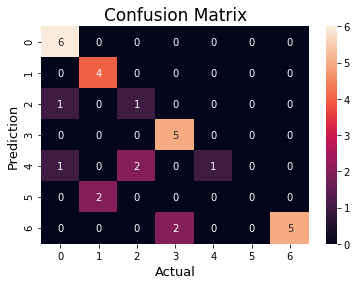

Accuracy   : 0.7333333333333333


In [48]:
y_pred = nb_classifier.predict(X_test)
 
# compute the confusion matrix
cm = confusion_matrix(y_test,y_pred)
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
 
 
# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)

### Ensemble Bagging

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
    base_estimator=nb_classifier, 
    n_estimators=100, 
    max_samples=0.95, 
    oob_score=True,
    random_state=0
)
bag_model.fit(X_train, y_train)
bag_model.oob_score_

0.7264957264957265

In [51]:
accuracy_score(y_test, bag_model.predict(X_test))


0.7

In [52]:
from sklearn.metrics import recall_score

# Calculate the weighted recall score
weighted_recall = recall_score(y_test, bag_model.predict(X_test), average='weighted')

print("Weighted Recall score:", weighted_recall)

Weighted Recall score: 0.7


In [53]:
precision_score(y_test, bag_model.predict(X_test), average='weighted')

C:\Users\bidve\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7323809523809524

In [54]:
from sklearn.metrics import f1_score

# Calculate the weighted F1 score
weighted_f1 = f1_score(y_test, bag_model.predict(X_test), average='weighted')


print("Weighted F1 score:", weighted_f1)

Weighted F1 score: 0.669206349206349


In [55]:
cm_bag_model = confusion_matrix(y_test, bag_model.predict(X_test)) 

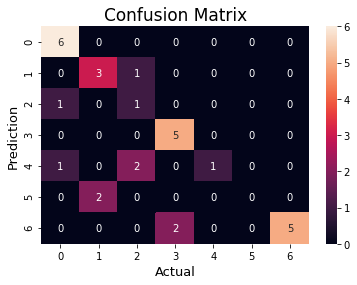

In [56]:
cm = confusion_matrix(y_test,y_pred)
 
#Plot the confusion matrix.
sns.heatmap(cm_bag_model,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [57]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
print("Weighted F1 score:", f1_score(y_test, y_pred, average='weighted'))
print("Weighted Recall score:", recall_score(y_test, y_pred, average='weighted'))

Accuracy:  0.7333333333333333
Precision:  0.7468253968253968
Weighted F1 score: 0.6914285714285714
Weighted Recall score: 0.7333333333333333


C:\Users\bidve\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
print("Accuracy: ", accuracy_score(y_test, bag_model.predict(X_test)))
print("Precision: ", precision_score(y_test, bag_model.predict(X_test), average='weighted'))
print("Weighted F1 score:", weighted_f1)
print("Weighted Recall score:", weighted_recall)

Accuracy:  0.7
Precision:  0.7323809523809524
Weighted F1 score: 0.669206349206349
Weighted Recall score: 0.7


C:\Users\bidve\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
